<a href="https://colab.research.google.com/github/GeorgeThan414/Machine_Learning_CSD/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf
import plotly.express as px

In [4]:
ticker_symbol = 'DX-Y.NYB'
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period='5y').reset_index(drop=False)
print(df)
print(f"The shape of the DataFrame is : {df.shape}")

                          Date        Open        High        Low       Close  \
0    2020-11-06 00:00:00-05:00   92.570000   92.820000  92.180000   92.230003   
1    2020-11-09 00:00:00-05:00   92.239998   92.959999  92.129997   92.730003   
2    2020-11-10 00:00:00-05:00   92.760002   92.970001  92.599998   92.750000   
3    2020-11-11 00:00:00-05:00   92.699997   93.209999  92.610001   93.040001   
4    2020-11-12 00:00:00-05:00   93.010002   93.139999  92.779999   92.959999   
...                        ...         ...         ...        ...         ...   
1252 2025-10-30 00:00:00-04:00   99.139999   99.720001  98.919998   99.529999   
1253 2025-10-31 00:00:00-04:00   99.489998   99.839996  99.419998   99.800003   
1254 2025-11-03 00:00:00-05:00   99.750000   99.989998  99.709999   99.870003   
1255 2025-11-04 00:00:00-05:00   99.980003  100.260002  99.739998  100.220001   
1256 2025-11-06 00:00:00-05:00  100.108002  100.108002  99.968002   99.984001   

      Volume  Dividends  St

# Task 1 - Line plot using plotly

In [5]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])
#change the layout to be readable
fig.update_layout(width=1600, height=1000)
fig.show()

# TASK 2 - Stastionary or Non-Stastionary

The four time series (Open, High, Low, Close) are non-stationary. Their sample mean is not stable across the observation period, it changes over time—so the series cannot be considered stationary. Moreover, due to the dynamic behaviour it is expected the trend to present significant fluctuactions and not to have a specific seasonality. Therefore, to indentify these signal properties, it is mandatory to make it stastionary at first, afterwards create the visualization to identify the seasonality patterns or the trend patterns.  

# TASK 3 - Regressor Isssues

The regressor will face several issues when forecasting non-stationary time series. Most machine learning algorithms, such as Linear Regression and SVR, are designed to work with stationary rather than dynamic non-stationary data.

However, in deep learning, models like LSTMs, stacked LSTMs, and state-of-the-art forecasting architectures such as Informer and Transformer-based forecasters can capture temporal dependencies and achieve accurate predicitons in long forecast horizons

In general, simpler forecasting algorithms tend to model the mean and trend of the time series. When these statistical properties are not stable over time, the models may overfit the training data and underfit or generalize poorly on unseen test samples.

# TASK 4 - Time of dollar between June and July 2025

The visualization below depicts the dynamic behavior of the time series between June and July 2025. According to the plot, the dollar price starts around 98-99 units. During the first 20 days of June, the series shows moderate fluctuations within a logical range of approximately ±1 dollar. However, after June 22, the dollar experiences a notable decline of about 2 units, before gradually recovering toward 100 units by the end of July.

The main factors contributing to this downturn which marked as the worst first half of any year since the early 1980s were largely policy uncertainty in the US.President Trump's inconsistent stance on tariff increases led to heightened market instability and unpredictable stock movements, resulting in significant price fluctuations. Additionally, the misalignment between Republican fiscal policies and Federal Reserve monetary policies amplified investor uncertainty.
On the other hand, the main reason that contributes to the dollar recover was the fall of the unemployment in the US and the increasement in jobs. Moreover after the June, the President seems to cool the density of the radical decisions with tarrifs, and starts making deals with the presidents around the world.

In [6]:
x= df['Date']
df['Date'] = pd.to_datetime(df['Date'])
mask = (df['Date'] >= '2025-06-01') & (df['Date'] <= '2025-07-31')
df_period = df.loc[mask]
fig = px.line(df_period, x='Date', y=['Open', 'High', 'Low', 'Close'])
#change the layout to be readable
fig.update_layout(width=1800, height=1000)
fig.show()

# TASK 5- Forecasting Cloze next timestep

I dont believe that a function with this formula f(ot,ht,lt,ct)=ct+1 can forecast the next day the close value. Timeseries do not have a deterministic behavior, they behave stochastically through time and are dependent on variosu factos. some of them are news, political desicions,flows, macro surprises which can arrived after the stock market closed and the next day the clozed value increases or decreases by many units. So even if we desing an algorithm which learns to predict the next time step (horiozn=1) of the cloze variable, using the **condition distribution ** (ct+1 |ot,ht,lt,ct) not an actual variable, will fail to have realistic results, because the cloze value will be conditioned depending only to the other values of previous timesteps.

# TASK 6 -Random Train-Test split.

In timeseries we do not make random train-test split, because the timeseries present **temporal dependecies** and if we split them randomly, is there a possibility to the model sees future values (data leakage) which is one of the most important issues in forecasting algorithms.

# Task 7 - Split the Data to Train and Test DataFrame sets


In [7]:
# Split the DataFrame to Train/Test DataFrames
# lem(Train) < Date[2024] , len(Test) >2024 & <2025

train_df = df[df['Date'] < '2024-01-01']
test_df  = df[(df['Date'] >= '2024-01-01') & (df['Date'] < '2025-01-01')]
#Drop the Date, Volume, Dividends and Stock Splits columns from both DataFrames.
train_df= train_df.drop(columns=['Date','Volume', 'Dividends', 'Stock Splits'])
test_df = test_df.drop(columns=['Date','Volume', 'Dividends', 'Stock Splits'])
print(train_df.shape, test_df.shape)
print(train_df)
print(test_df)


(791, 4) (252, 4)
           Open        High         Low       Close
0     92.570000   92.820000   92.180000   92.230003
1     92.239998   92.959999   92.129997   92.730003
2     92.760002   92.970001   92.599998   92.750000
3     92.699997   93.209999   92.610001   93.040001
4     93.010002   93.139999   92.779999   92.959999
..          ...         ...         ...         ...
786  101.760002  101.900002  101.430000  101.699997
787  101.650002  101.769997  101.449997  101.470001
788  101.550003  101.570000  100.830002  100.989998
789  100.870003  101.300003  100.620003  101.230003
790  101.199997  101.419998  101.070000  101.330002

[791 rows x 4 columns]
            Open        High         Low       Close
791   101.419998  102.250000  101.339996  102.199997
792   102.150002  102.730003  102.080002  102.459999
793   102.459999  102.529999  102.150002  102.419998
794   102.400002  103.099998  101.910004  102.410004
795   102.440002  102.620003  102.080002  102.209999
...          ...

# TASK 8 - Create Sliding Windows with horizon=1

In [8]:
def make_windows(data_dataframe, n):
  # Data is the timeframes, n : timesteps per window
  x, y= [], []
  data_array = np.array(data_dataframe)
  for i in range(len(data_dataframe)- n ):
        end = i + n
        x.append(data_array[i: end])
        y.append(data_array[end, 3])

  return np.array(x), np.array(y)

# Output if the N=5.
inputs, targets = make_windows(train_df, 5)
inputs[0], inputs.shape, targets.shape, targets[0]

(array([[92.56999969, 92.81999969, 92.18000031, 92.23000336],
        [92.23999786, 92.95999908, 92.12999725, 92.73000336],
        [92.76000214, 92.97000122, 92.59999847, 92.75      ],
        [92.69999695, 93.20999908, 92.61000061, 93.04000092],
        [93.01000214, 93.13999939, 92.77999878, 92.95999908]]),
 (786, 5, 4),
 (786,),
 np.float64(92.76000213623047))

# Task 9- Large or Small Window Size.

To predict the next timestep (the value in the next day of the feature) the size of the window size shoul dbe large. In general to forecast the future values with horizon like 24, 48 or 96 etc, the window size should be large and contains some important temporal dependeces taht model can extract and make an accurace prediction. For Horizon=1, the sliding window can be smaller, not only its reduntancy to define the window size equal to 100, but also it will be a waste of resources and time, because even size 32 or 20 it will work for one -step prediction.

# Task 10 - x_train, y_train, x_test, y_test with N=5


In [14]:
# Split the data and create the necessary matrixes.
N=5
x_train, y_train = make_windows(train_df, N)
x_test, y_test =make_windows(test_df, N)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reshape the matrixes to vectors, in order to be used by sklearn modules.
X_train = x_train.reshape(x_train.shape[0],-1)  # automaticcaly multiplies the last two dimensions.
X_test =x_test.reshape(x_test.shape[0],-1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(f"First training sample :\n{X_train[0]}")
print(f"Target value for first training sample : {y_train[0]}")
print(f"Target value for first testing sample : {y_test[0]}")
# The preprocessing has been succesfully achieved, because below we see 20 timesteps from X_train[0] and the next timestep attached from y_train[0]

(786, 5, 4) (786,) (247, 5, 4) (247,)
(786, 20) (786,) (247, 20) (247,)
First training sample :
[92.56999969 92.81999969 92.18000031 92.23000336 92.23999786 92.95999908
 92.12999725 92.73000336 92.76000214 92.97000122 92.59999847 92.75
 92.69999695 93.20999908 92.61000061 93.04000092 93.01000214 93.13999939
 92.77999878 92.95999908]
Target value for first training sample : 92.76000213623047
Target value for first testing sample : 102.56999969482422


# Task 11- TRAIN Regressors using MAE as metric.

# A) Linear Regressor


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

#Initialize the losses
loss_train_linear_reg=[]
loss_test_linear_reg=[]
#Define scaler.
# Fit to the data
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define the seed.
model=LinearRegression()
model.fit(X_train, y_train)
X_train_predictions= model.predict(X_train)
metric_train= mean_absolute_error(y_train, X_train_predictions)
print(f"Mean Absolute Error of the model in Train set is : {metric_train}")
predictions= model.predict(X_test)
# No need to inverse transform and the calculate the error, because the scaler only applied to the x_train.
metric_test= mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error of the model in Test set is : {metric_test}")

#Store the losses in train and test set
loss_train_linear_reg.append(metric_train)
loss_test_linear_reg.append(metric_test)


Mean Absolute Error of the model in Train set is : 0.34575245774919067
Mean Absolute Error of the model in Test set is : 0.28455986768370906


# B) Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

#Initialize the lists of losses
loss_train_random_forest=[]
loss_test_random_forest=[]
# Note: Tree-based model does not require the data to be scaled for the decision.
# But the data is already scaled so we keep it like that.
seed = 0
model=RandomForestRegressor(n_estimators=100, max_depth=None, random_state=seed)
model.fit(X_train, y_train)
X_train_predictions= model.predict(X_train)
metric_train= mean_absolute_error(y_train, X_train_predictions)
print(f"Mean Absolute Error of the model in Train set is : {metric_train}")
predictions= model.predict(X_test)
metric_test= mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error of the model in Test set is : {metric_test}")
#Store the losses in train and test set
loss_train_random_forest.append(metric_train)
loss_test_random_forest.append(metric_test)


Mean Absolute Error of the model in Train set is : 0.1473777267223097
Mean Absolute Error of the model in Test set is : 0.32485794468929896


# C)  Bagging Regressor


In [17]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the losses
loss_train_bagging=[]
loss_test_bagging=[]

seed=0
base = DecisionTreeRegressor(
    max_depth=None,
    min_samples_leaf=2,
    random_state=seed
)

bag = BaggingRegressor(
    estimator=base,          # base learner
    n_estimators=100,
    max_samples=1.0,         # bootstrap sample size fraction
    random_state=seed
)

bag.fit(X_train, y_train)
X_train_predictions= bag.predict(X_train)
metric_train= mean_absolute_error(y_train, X_train_predictions)
print(f"Mean Absolute Error of the model in Train set is : {metric_train}")
pred = bag.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error of the model in Test set is : {mae}")
loss_train_bagging.append(metric_train)
loss_test_bagging.append(mae)

Mean Absolute Error of the model in Train set is : 0.1681863050141073
Mean Absolute Error of the model in Test set is : 0.3264898712955742


# D) Stacking Regressor


In [18]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor

#Initialize the losses
loss_train_stacking=[]
loss_test_stacking=[]
# using two models Linear Regression + Decision Tree
seed=0
decision_tree_base = DecisionTreeRegressor(
    max_depth=None,
    min_samples_leaf=2,
    random_state=seed)

reggressor = LinearRegression()

estimators = [
    ('base', decision_tree_base),
    ('reg', reggressor) ]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=None,   # Sklearn as final_estimator takes the RidgeCV (with default parameters)
    passthrough=False) #takes only the predictions out of the estimators.

# Fit the model
stack.fit(X_train, y_train)
X_train_predictions= stack.predict(X_train)
metric_train= mean_absolute_error(y_train, X_train_predictions)
print(f"Mean Absolute Error of the model in Train set is : {metric_train}")
# Predict future value
pred = stack.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error of the model in Test set is : {mae}")
# For extra experimentation we can define the RidgeCV, define some parameters in the regressor.
# Also change some parameters in the Decision Tree in order to achieve more accurate predictions.
loss_train_stacking.append(metric_train)
loss_test_stacking.append(mae)

Mean Absolute Error of the model in Train set is : 0.35327274214142523
Mean Absolute Error of the model in Test set is : 0.2862238112112042


# Bar plot


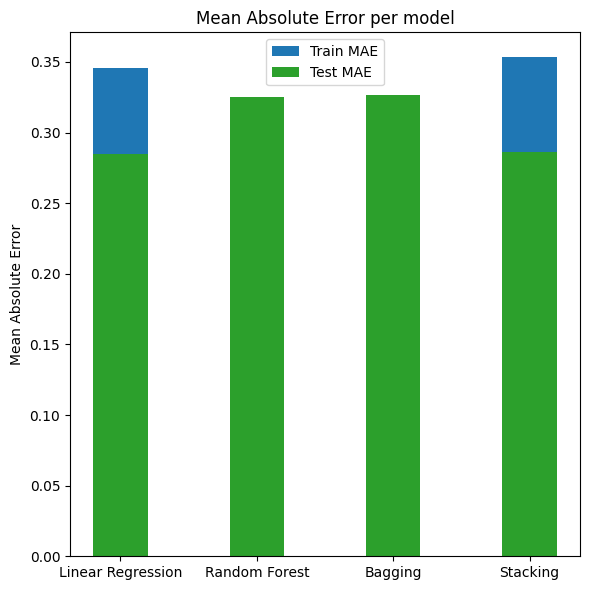

In [19]:
Total_list_training = (loss_train_linear_reg + loss_train_random_forest +loss_train_bagging + loss_train_stacking)
Total_list_testing = (loss_test_linear_reg + loss_test_random_forest +loss_test_bagging + loss_test_stacking)

models=['Linear Regression', 'Random Forest', 'Bagging', 'Stacking']
x = np.arange(len(models))
w=0.4
plt.figure(figsize=(6,6))
plt.bar(x , Total_list_training, width=w, color='tab:blue', label='Train MAE')
plt.bar(x , Total_list_testing, width=w, color='tab:green', label='Test MAE')
plt.xticks(x, models)
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error per model')
plt.legend()
plt.tight_layout()
plt.show()


#How model works


The first model the **linear regression**, learns the linear relantionship between the features and tries to predict the future value on the target feature.

The second model the **Random Forest Regressor**, combines many random decision trees and average over their predictions, mitigating the overall error.

The third model the **Bagging Regressor**, trains a lot of indepentent and distinct decision trees using different subsets of the data (bootstrap samples). Then combine all the preidtions to reduce the error.

Final Algorithm the **Stacking Regressor**, combines different algorithms, different models to make predictions. Then using the output of the models trains a meta-learner (meta-model) to achieve better prediction results

# Task 12 - Feature Engineering


# TASK-12 A)

In [20]:
# Add two new features from Date column, the month and the date of the month
# Convert the Date to datetime object
df['Date'] = pd.to_datetime(df['Date'])
# Create two new features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
print(df[['Date', 'Open', 'High', 'Low', 'Close', 'Day', 'Month']].head())


                       Date       Open       High        Low      Close  Day  \
0 2020-11-06 00:00:00-05:00  92.570000  92.820000  92.180000  92.230003    6   
1 2020-11-09 00:00:00-05:00  92.239998  92.959999  92.129997  92.730003    9   
2 2020-11-10 00:00:00-05:00  92.760002  92.970001  92.599998  92.750000   10   
3 2020-11-11 00:00:00-05:00  92.699997  93.209999  92.610001  93.040001   11   
4 2020-11-12 00:00:00-05:00  93.010002  93.139999  92.779999  92.959999   12   

   Month  
0     11  
1     11  
2     11  
3     11  
4     11  


Specifically, the month feature helps the model to capture **seasonality**. Seasonality provides repeating patterns or trends that occur at similar times each year, like repeating patterns in holidays.

# TASK 12 - B)

In [21]:
df_log_returns= df.copy()
for col in ['Open', 'High', 'Low', 'Close']:
    df_log_returns[col] = np.log(df_log_returns[col]) - np.log(df_log_returns[col].shift(1))
df_log_returns
#When the value of a variable increases in the next timestep, log returns should be positive.
#When the value of a variable decreases in the next timestep, log returns should be negative.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month
0,2020-11-06 00:00:00-05:00,NaN,NaN,NaN,NaN,0,0.0,0.0,6,11
1,2020-11-09 00:00:00-05:00,-0.003571,0.001507,-0.000543,0.005407,0,0.0,0.0,9,11
2,2020-11-10 00:00:00-05:00,0.005622,0.000108,0.005089,0.000216,0,0.0,0.0,10,11
3,2020-11-11 00:00:00-05:00,-0.000647,0.002578,0.000108,0.003122,0,0.0,0.0,11,11
4,2020-11-12 00:00:00-05:00,0.003339,-0.000751,0.001834,-0.000860,0,0.0,0.0,12,11
...,...,...,...,...,...,...,...,...,...,...
1252,2025-10-30 00:00:00-04:00,0.004043,0.003617,0.003037,0.003119,0,0.0,0.0,30,10
1253,2025-10-31 00:00:00-04:00,0.003524,0.001203,0.005042,0.002709,0,0.0,0.0,31,10
1254,2025-11-03 00:00:00-05:00,0.002610,0.001501,0.002913,0.000701,0,0.0,0.0,3,11
1255,2025-11-04 00:00:00-05:00,0.002303,0.002697,0.000301,0.003498,0,0.0,0.0,4,11


# TASK 12 C)

Using the log-returns, we are achieving two goals.

1) First is the reducing of trend, converting the non-stastionairy timeseries to more stastionary behaviour, making regressor algorithms achieve better results and capture the more stable patterns.

2) Log-returns adding to the timeseries a factor len(yt+1/yt), which lead to more gaussian and symmetric distribution as we can notie below in the histograms. So overall the mean and std have been enhanced and been more stable than before, helping the model to capture better the hidden patterns.

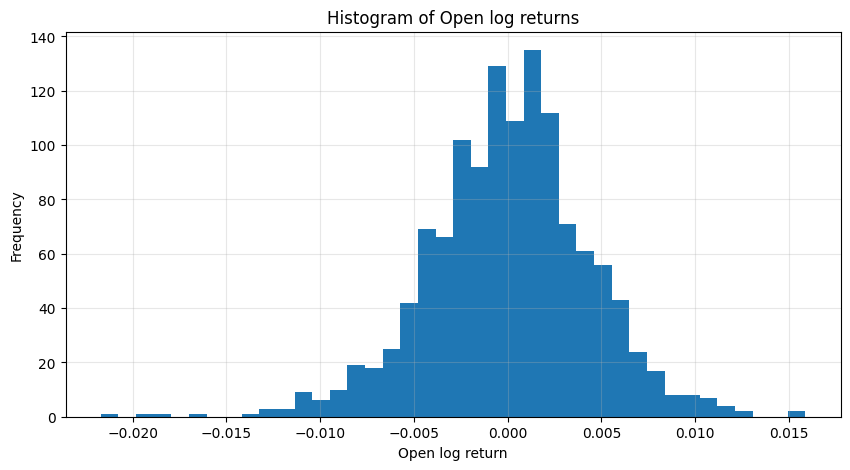

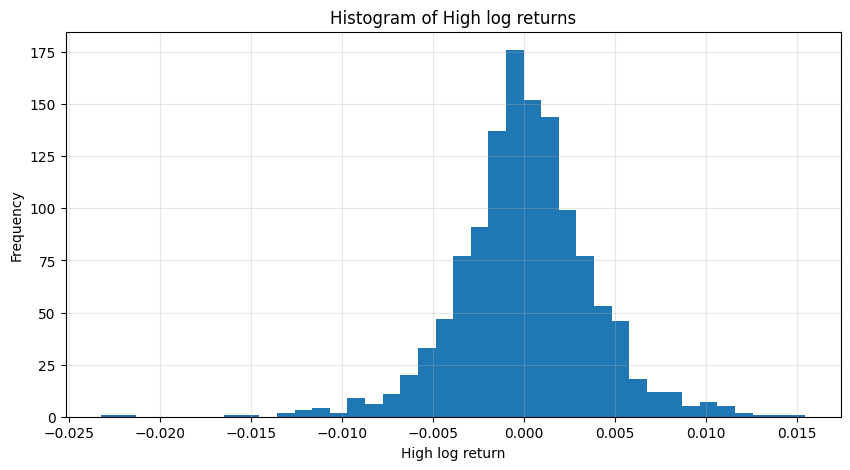

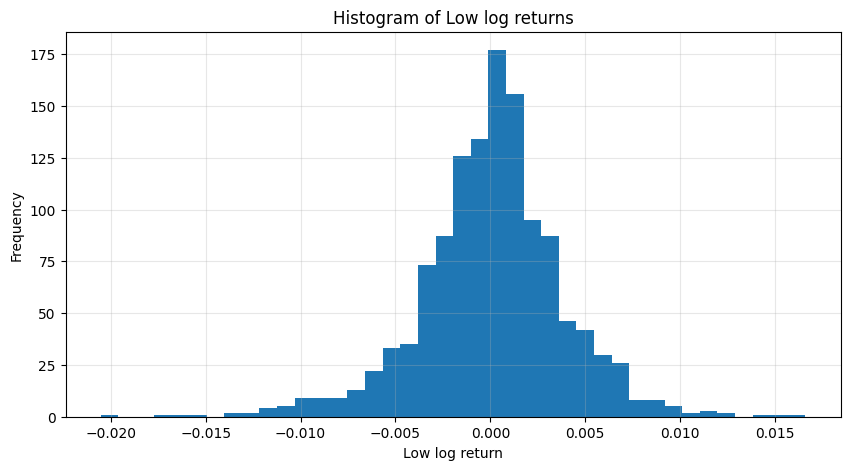

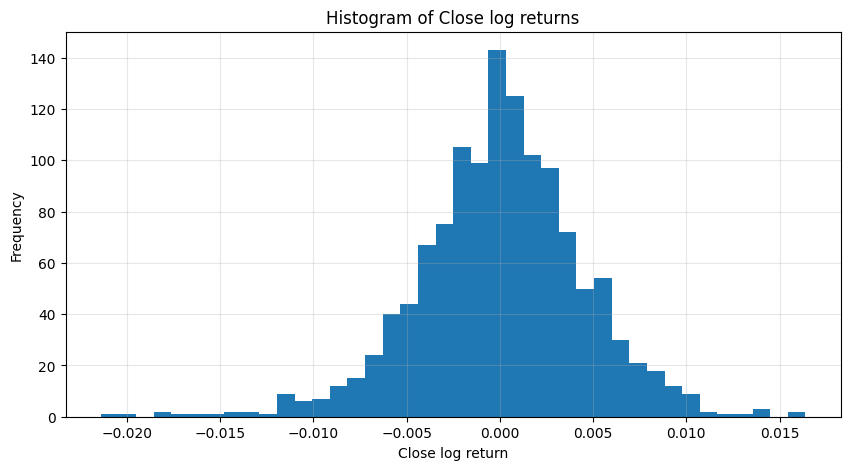

In [ ]:
# Create Histograms for each column and explain if the above formula will help.
# Before plotting the histograms we need to remove the NaN values from the dataframe.

cols = [c for c in ['Open','High','Low','Close']]

for col in cols:
    data = df_log_returns[col].dropna()
    plt.figure(figsize=(10, 5))
    plt.hist(data, bins=40)
    plt.title(f'Histogram of {col} log returns')
    plt.xlabel(f'{col} log return')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()




# Task 12 - d)  Ct+1= 0.01, Ct=0.95

Based on the above transformation the Ct+1=0.01 is not the actual value in original scale of attribute close, is the log return. According to the log-return formula and Ct=0.95, the fomula is ln(Unit_Close_{t+1} /0.95) =0.01, which is concluded to **Close_{t+1}= 0.95 * e^{0.01} = 0.9595$**

Log returns is positive, so it is expected the actual value to be increased related to the previous day.











# Task 12 - e) Repeat the preivious steps.

In [35]:
train_df_log = df_log_returns[df_log_returns['Date'] < '2024-01-01']
test_df_log  = df_log_returns[(df_log_returns['Date'] >= '2024-01-01') & (df_log_returns['Date'] < '2025-01-01')]
#Drop the Date, Volume, Dividends and Stock Splits columns from both DataFrames.
train_df_log= train_df_log.drop(columns=['Date','Volume','Dividends','Stock Splits'])
test_df_log = test_df_log.drop(columns=['Date','Volume','Dividends','Stock Splits'])
# Revome the first row, which consist of Nan
train_df_log = train_df_log.dropna()
test_df_log = test_df_log.dropna()
print(train_df_log.shape, test_df_log.shape)
#Difference in shapes is from dropnna() function which removes the NaN
print(train_df_log)
print(test_df_log)

(790, 6) (252, 6)
         Open      High       Low     Close  Day  Month
1   -0.003571  0.001507 -0.000543  0.005407    9     11
2    0.005622  0.000108  0.005089  0.000216   10     11
3   -0.000647  0.002578  0.000108  0.003122   11     11
4    0.003339 -0.000751  0.001834 -0.000860   12     11
5   -0.000645 -0.001397 -0.000755 -0.002154   13     11
..        ...       ...       ...       ...  ...    ...
786 -0.006172 -0.005383 -0.003052 -0.001376   22     12
787 -0.001082 -0.001277  0.000197 -0.002264   26     12
788 -0.000984 -0.001967 -0.006130 -0.004742   27     12
789 -0.006719 -0.002662 -0.002085  0.002374   28     12
790  0.003266  0.001184  0.004462  0.000987   29     12

[790 rows x 6 columns]
          Open      High       Low     Close  Day  Month
791   0.002172  0.008151  0.002668  0.008549    2      1
792   0.007172  0.004683  0.007276  0.002541    3      1
793   0.003030 -0.001949  0.000685 -0.000390    4      1
794  -0.000586  0.005544 -0.002352 -0.000098    5      1
7

In [32]:
N=5
x_train_log, y_train_log = make_windows(train_df_log, N)
x_test_log, y_test_log =make_windows(test_df_log, N)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reshape the matrixes to vectors, in order to be used by sklearn modules.
X_train_log = x_train_log.reshape(x_train_log.shape[0],-1)  # automaticcaly multiplies the last two dimensions.
X_test_log =x_test_log.reshape(x_test_log.shape[0],-1)
print(X_train_log.shape, y_train_log.shape, X_test_log.shape, y_test_log.shape)
print(f"First training sample :\n{X_train_log[0]}")
print(f"Target value for first training sample : {y_train_log[0]}")
print(f"Target value for first testing sample : {y_test_log[0]}")

(786, 5, 4) (786,) (247, 5, 4) (247,)
(785, 30) (785,) (247, 30) (247,)
First training sample :
[-3.57125898e-03  1.50715273e-03 -5.42597294e-04  5.40658737e-03
  9.00000000e+00  1.10000000e+01  5.62168262e-03  1.07590343e-04
  5.08853187e-03  2.15620474e-04  1.00000000e+01  1.10000000e+01
 -6.47095766e-04  2.57812865e-03  1.08008599e-04  3.12181656e-03
  1.10000000e+01  1.10000000e+01  3.33859757e-03 -7.51271250e-04
  1.83395239e-03 -8.60234796e-04  1.20000000e+01  1.10000000e+01
 -6.45355887e-04 -1.39669378e-03 -7.54754423e-04 -2.15374784e-03
  1.30000000e+01  1.10000000e+01]
Target value for first training sample : -0.0020504236345653126
Target value for first testing sample : 0.0035159779603590735


# A) Linear Regressor

In [36]:
#Initialize the losses
loss_train_linear_reg_log=[]
loss_test_linear_reg_log=[]
#Define scaler.
# Fit to the data
scaler = StandardScaler()
X_train_log= scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

#Define the seed.
model=LinearRegression()
model.fit(X_train_log, y_train_log)
X_train_predictions_log= model.predict(X_train_log)
metric_train_log= mean_absolute_error(y_train_log, X_train_predictions_log)
print(f"Mean Absolute Error of the model in Train set is : {metric_train_log}")
predictions_log= model.predict(X_test_log)
# No need to inverse transform and the calculate the error, because the scaler only applied to the x_train.
metric_test_log= mean_absolute_error(y_test_log, predictions_log)
print(f"Mean Absolute Error of the model in Test set is : {metric_test_log}")

#Store the losses in train and test set
loss_train_linear_reg_log.append(metric_train_log)
loss_test_linear_reg_log.append(metric_test_log)

Mean Absolute Error of the model in Train set is : 0.0033932738531179613
Mean Absolute Error of the model in Test set is : 0.0028649913262891904


# B) Random Forest Regressor

In [38]:
#Initialize the lists of losses
loss_train_random_forest_log=[]
loss_test_random_forest_log=[]
# Note: Tree-based model does not require the data to be scaled for the decision.
# But the data is already scaled so we keep it like that.
seed = 0
model=RandomForestRegressor(n_estimators=100, max_depth=None, random_state=seed)
model.fit(X_train_log, y_train_log)
X_train_predictions_log= model.predict(X_train_log)
metric_train_log= mean_absolute_error(y_train_log, X_train_predictions_log)
print(f"Mean Absolute Error of the model in Train set is : {metric_train_log}")
predictions_log= model.predict(X_test_log)
metric_test_log= mean_absolute_error(y_test_log, predictions_log)
print(f"Mean Absolute Error of the model in Test set is : {metric_test_log}")
#Store the losses in train and test set
loss_train_random_forest_log.append(metric_train_log)
loss_test_random_forest_log.append(metric_test_log)


Mean Absolute Error of the model in Train set is : 0.0013466613578921541
Mean Absolute Error of the model in Test set is : 0.0028672576445617623


# C)  Bagging Regressor

In [39]:

# Initialize the losses
loss_train_bagging_log=[]
loss_test_bagging_log=[]

seed=0
base = DecisionTreeRegressor(
    max_depth=None,
    min_samples_leaf=2,
    random_state=seed
)

bag = BaggingRegressor(
    estimator=base,          # base learner
    n_estimators=100,
    max_samples=1.0,         # bootstrap sample size fraction
    random_state=seed
)

bag.fit(X_train_log, y_train_log)
X_train_predictions_log= bag.predict(X_train_log)
metric_train_log= mean_absolute_error(y_train_log, X_train_predictions_log)
print(f"Mean Absolute Error of the model in Train set is : {metric_train_log}")
pred_log = bag.predict(X_test_log)
mae_log = mean_absolute_error(y_test_log, pred_log)
print(f"Mean Absolute Error of the model in Test set is : {mae_log}")
loss_train_bagging_log.append(metric_train_log)
loss_test_bagging_log.append(mae_log)

Mean Absolute Error of the model in Train set is : 0.001457061725224747
Mean Absolute Error of the model in Test set is : 0.0029113790832095555


# D) Stacking Regressor

In [43]:
#Initialize the losses
loss_train_stacking_log=[]
loss_test_stacking_log=[]
# using two models Linear Regression + Decision Tree
seed=0
decision_tree_base = DecisionTreeRegressor(
    max_depth=None,
    min_samples_leaf=2,
    random_state=seed)

reggressor = LinearRegression()

estimators = [
    ('base', decision_tree_base),
    ('reg', reggressor) ]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=None,   # Sklearn as final_estimator takes the RidgeCV (with default parameters)
    passthrough=False) #takes only the predictions out of the estimators.

# Fit the model
stack.fit(X_train_log, y_train_log)
X_train_predictions_log= stack.predict(X_train_log)
metric_train_log= mean_absolute_error(y_train_log, X_train_predictions_log)
print(f"Mean Absolute Error of the model in Train set is : {metric_train_log}")
# Predict future value
pred_log = stack.predict(X_test_log)
mae_log = mean_absolute_error(y_test_log, pred_log)
print(f"Mean Absolute Error of the model in Test set is : {mae_log}")
# For extra experimentation we can define the RidgeCV, define some parameters in the regressor.
# Also change some parameters in the Decision Tree in order to achieve more accurate predictions.
loss_train_stacking_log.append(metric_train_log)
loss_test_stacking_log.append(mae_log)

Mean Absolute Error of the model in Train set is : 0.003456433663215057
Mean Absolute Error of the model in Test set is : 0.0027195541458525973


# Task 13 - Line-plot with the most accurare Predictions.


      # Linear Regressor:  MAE :0.00286
      # Random forest Regressor:  MAE : 0.00286
      # Bagging Regressor:  MAE: 0.00291
      # Stacking Regressor:  MAE: 0.00271
# The model which achieve the smallest loss is the  **Stacking Regressor**

# Inverse tranform, from log-returns to actual values and plot the predictions of the Stacking Regressor.


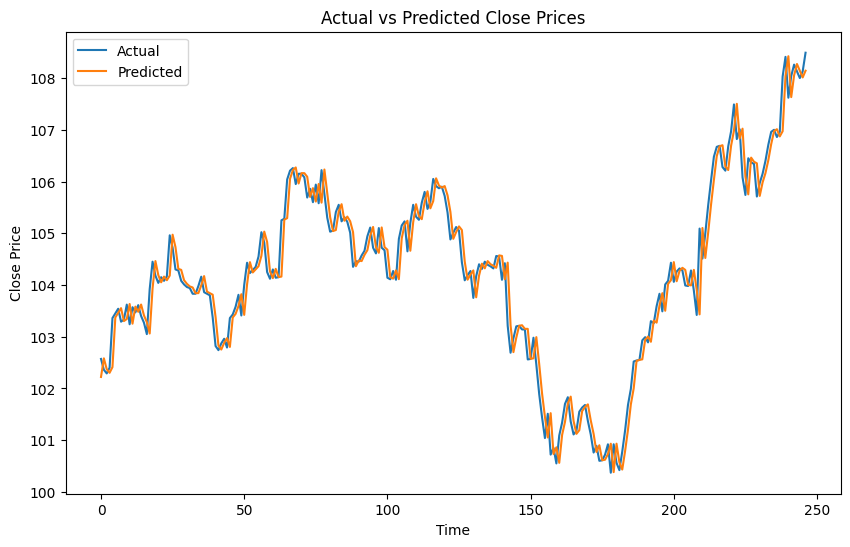

In [49]:
# y_pred -> predicted log-returns
#X_test_log -> input windows (flattened) from previous cell of code.
# To reconstrunct to initial timesereis we need two things:
#  1) The last known Close value  before prediction
#  2) The predicted log-return for the next step

# Get the Ct for each window
last_close_test = test_df['Close'].to_numpy()[N-1 : N-1 + len(y_test_log)]

# Reconstruct the predicted and the actual values:
C_t= last_close_test * np.exp(y_test_log)
C_t_pred= last_close_test * np.exp(pred_log)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(C_t, label='Actual')
plt.plot(C_t_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()